1. Сформувати в папці на диску набір із 15 зображень різних форматів, розмірів та колірних моделей. Додати туди 2-3 файли, що не є зображеннями.

2. Створити функцію, що в якості аргумента приймає адресу папки на диску та повертає датафрейм з наступною інформацією про зображення, що знаходяться в папці:
- ім’я файлу;
- кольорову модель;
- формат;
- кількість каналів у зображенні;
- розмір файлу у мегабайтах байтах, округлених до двох знаків після коми;
- ширину картинки;
- висоту картинки;
- повний шлях до файлу;
- зменшене зображення.

In [1]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


,File Name,Color Model,Format,Channels,File Size (MB),Width,Height,Full Path,Resized Image
0,1440102995_imag,RGB,jpg,3,0.44,2844,1600,album\1440102995_imag.jpg,
1,1593371201118644383,RGB,jpg,3,0.64,2048,1152,album\1593371201118644383.jpg,
2,EHJZz1N,RGB,jpg,3,0.48,2560,1440,album\EHJZz1N.jpg,
3,mass-effect-3,RGB,jpg,3,0.50,1920,1080,album\mass-effect-3.jpg,
4,ScreenShot00000,RGB,bmp,3,25.31,4096,2160,album\ScreenShot00000.bmp,
5,ScreenShot00002,RGB,bmp,3,25.31,4096,2160,album\ScreenShot00002.bmp,
6,ScreenShot00003,RGB,bmp,3,25.31,4096,2160,album\ScreenShot00003.bmp,
7,ScreenShot00004,RGB,bmp,3,25.31,4096,2160,album\ScreenShot00004.bmp,
8,ScreenShot00005,RGB,bmp,3,23.73,3840,2160,album\ScreenShot00005.bmp,
9,ScreenShot00006,RGB,bmp,3,23.73,3840,2160,album\ScreenShot00006.bmp,

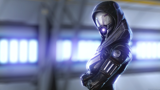
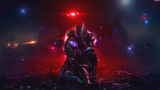
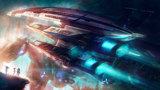
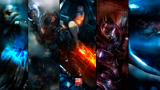
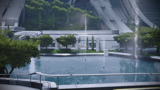
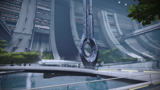
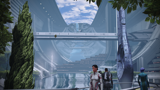
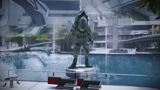
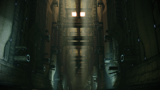
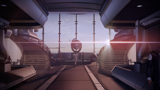
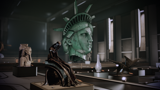
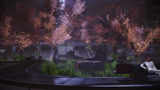
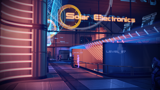
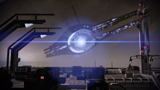
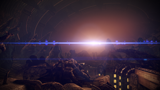
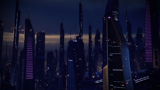
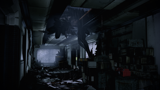
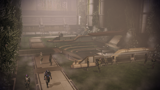
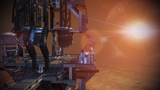
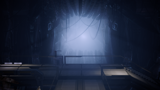
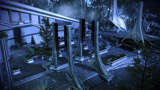
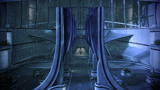
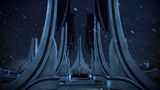
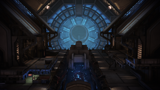
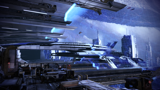
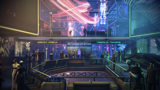
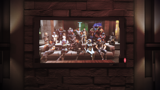
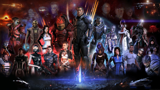
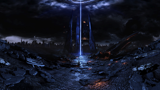

In [29]:
import os
import glob
import base64
from PIL import Image
import pandas as pd
from IPython.display import display, HTML

def image_to_base64(image):
    buffered = BytesIO()
    image.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode('utf-8')

def process_images(folder_path):
    image_info_list = []

    all_files = glob.glob(os.path.join(folder_path, '*'))

    for file_path in all_files:
        file_name, file_extension = os.path.splitext(os.path.basename(file_path))

        if file_extension.lower() in ['.jpg', '.jpeg', '.png', '.gif', '.bmp']:
            try:
                with Image.open(file_path) as img:
                    image_info = {
                        'File Name': file_name,
                        'Color Model': img.mode,
                        'Format': file_extension[1:],  
                        'Channels': len(img.getbands()),
                        'File Size (MB)': round(os.path.getsize(file_path) / (1024 * 1024), 2),
                        'Width': img.width,
                        'Height': img.height,
                        'Full Path': file_path,
                        'Resized Image': f'<img src="data:image/png;base64,{image_to_base64(img.resize((160, 90)))}" />'
                    }

                    image_info_list.append(image_info)

            except Exception as e:
                print(f"Error processing {file_name}: {str(e)}")

    image_df = pd.DataFrame(image_info_list)

    return image_df

folder_path = 'album'
image_dataframe = process_images(folder_path)

display(HTML(image_dataframe.to_html(escape=False)))


3. Створити функцію, що в якості аргумента приймає:
- шлях до папки;
- назва вихідного зображення;
- кількість зображень в рядку;
- кількість зображень в стовпчику і повертає зображення постера.

Вважаємо, що постер є прямокутним і число картинок в постері a  b, де а – число стовпчиків, а b – число рядків.

In [32]:
import os
import random
from PIL import Image, ImageDraw

def resize_and_crop(image_path, size):
    img = Image.open(image_path)
    
    img.thumbnail((size, size))
    
    left = (img.width - size) // 2
    top = (img.height - size) // 2
    right = (img.width + size) // 2
    bottom = (img.height + size) // 2
    
    img = img.crop((left, top, right, bottom))
    
    return img

def apply_random_color_filter(image):
    filter_color = tuple(random.randint(0, 255) for _ in range(3))
    filtered_image = Image.blend(image, Image.new('RGB', image.size, filter_color), alpha=0.5)
    
    return filtered_image

def generate_poster(folder_path, output_name, columns, rows):
    allowed_formats = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']
    all_files = [file for file in os.listdir(folder_path) if file.lower().endswith(tuple(allowed_formats))]

    image_paths = []

    for _ in range(columns * rows):
        random_image_path = os.path.join(folder_path, random.choice(all_files))
        image_paths.append(random_image_path)

    poster_width = columns * 500
    poster_height = rows * 500
    poster = Image.new('RGB', (poster_width, poster_height), 'white')

    for i in range(rows):
        for j in range(columns):
            image_path = image_paths[i * columns + j]
            resized_image = resize_and_crop(image_path, 500)
            colored_image = apply_random_color_filter(resized_image)
            poster.paste(colored_image, (j * 500, i * 500))

    output_path = os.path.join(folder_path, output_name)
    poster.save(output_path)

    return output_path

folder_path = 'album'
output_name = 'poster1.png'
columns = 2
rows = 2

generate_poster(folder_path, output_name, columns, rows)


'album\\poster1.png'